The goal of this tutorial is to build a script that allows to compute the elementary stiffness matrix of an exion beam
of a beam in exion using Hermite elements with two nodes.
With $E = 200 GPa, Igz=29*10^{-6} m^{4}
, h = 150 mm, L = 1 m, F_{0}=100 N, q_{0} = 2.4 kN/m$
In the global reference frame the element e has length $h^{e}$ and it is localized by the positions $x_{1}^{e}$for node 1 and $x_{2}^{e}$ for node 2.

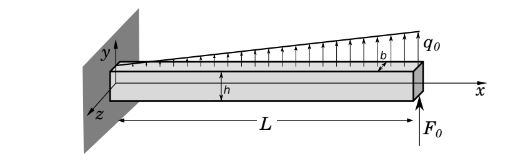

# **Shape Functions :**


---
$\psi_{1}^{e}(\bar{x})=1-3\frac{\bar{x}^2}{he^2} + 2\frac{\bar{x}^3}{he^3}$

$\psi_{2}^{e}(\bar{x})=\bar{x}-2\frac{\bar{x}^2}{he} + \frac{\bar{x}^3}{he^2}$

$\psi_{3}^{e}(\bar{x})=3\frac{\bar{x}^2}{he^2} - 2\frac{\bar{x}^3}{he^3}$

$\psi_{4}^{e}(\bar{x})=-\frac{\bar{x}^2}{he} + \frac{\bar{x}^3}{he^2}$

In [2]:
import numpy as np 
from scipy import integrate
import matplotlib.pyplot as plt

def psi(x1,x2,k):
    he=x2-x1
    x=np.linspace(0,he,100)
    l=list()
    if(k==1):
        l=1 - 3*(pow(x,2)/(he*he)) + 2*(pow(x,3)/pow(he,3))
      #plt.plot(x, l, color = "dodgerblue", alpha= 0.75, label = "$\psi 1$")
    if(k==2):
        l=x-(2*(pow(x,2)/he))+(pow(x,3)/(he*he))
      #plt.plot(x, l, color = "blue", alpha= 0.75, label = "$\psi 2$")
    if(k==3):
        l=3*(pow(x,2)/(he*he)) - 2*(pow(x,3)/pow(he,3))
      #plt.plot(x, l, color = "green", alpha= 0.75, label = "$\psi 3$")
    if(k==4):
        l= -(pow(x,2)/he) + (pow(x,3)/pow(he,2))
      #plt.plot(x, l, color = "red", alpha= 0.75, label = "$\psi 4$")
    
    return l

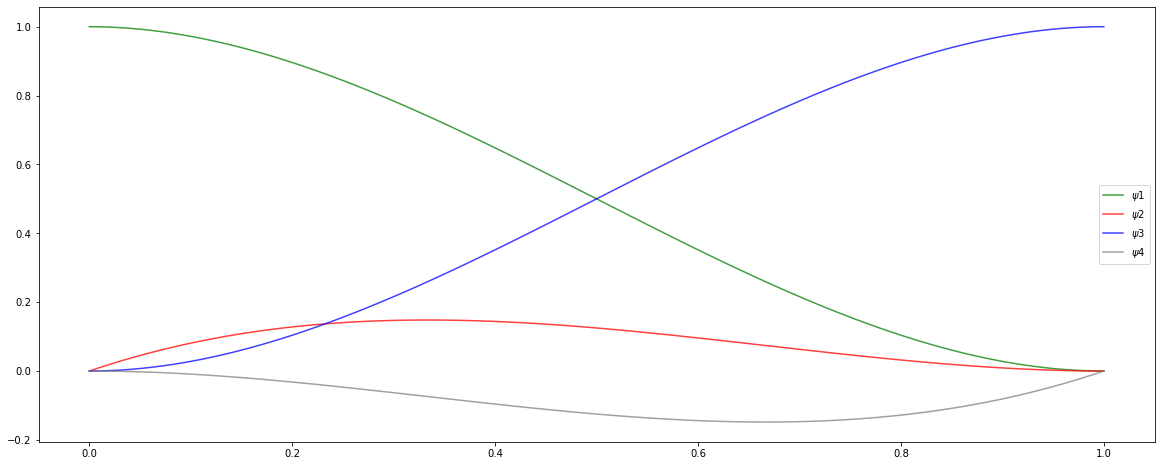

In [3]:
plt.figure(figsize=(20,8))
x=np.linspace(0,1,100)
plt.plot(x, psi(0,1,1), color = "green", alpha= 0.75, label = "$\psi 1$")
plt.plot(x, psi(0,1,2), color = "red", alpha= 0.75, label = "$\psi 2$")
plt.plot(x, psi(0,1,3), color = "blue", alpha= 0.75, label = "$\psi 3$")
plt.plot(x, psi(0,1,4), color = "gray", alpha= 0.75, label = "$\psi 4$")
psi(0,1,2)
psi(0,1,3)
psi(0,1,4)

plt.legend()
plt.show()

# **Second derivatives of shape functions :**


---
$(\psi_{1}^{e}(\bar{x}))^{''}=\frac{-6}{he^2} + \frac{12\bar{x}}{he^3}$

$(\psi_{2}^{e}(\bar{x}))^{''}=\frac{-4}{he} + \frac{\bar{x}^3}{he^2}$

$(\psi_{3}^{e}(\bar{x}))^{''}=\frac{6}{he^2} + \frac{-12\bar{x}}{he^3}$

$(\psi_{4}^{e}(\bar{x}))^{''}=\frac{-2}{he} + \frac{6\bar{x}}{he^2}$



In [4]:
def d2_psi(x1,x2,k):
    he=x2-x1
    x=np.linspace(0,he,100)
    l=list()
    if(k==1):
        l= -6/(he*he) + 12*(x)/pow(he,3) 
          #plt.plot(x, l, color = "green", alpha= 0.75, label = "$d2\psi 1$")
    if(k==2):
          l=-4/he + 6*(x/(he*he)) 
    if(k==3):
          l=6/(he*he) - 12*(x/pow(he,3))   
    if(k==4):
          l= -2/he + 6*(x/pow(he,2))
    return l

**1/ Implementation of the Elemental Stiffness Matrix  :** 

$K_{ij}^{e}$$=\int_{0}^{he}E(\bar{x})Igz(\bar{x})(\psi_{i}^{e}(\bar{x}))^{''}(\psi_{j}^{e}(\bar{x}))^{''}d\bar{x}$

 $ [K^e] =  \frac{2EIgz}{h_{e}^3}\cdot
 \begin{pmatrix}
  6 & 3h_{e}  &  -6 & 3h_{e} \\
  3h_{e} & 2h_{e}^2 &  -3h_{e}   &h_{e}^2 \\
   -6 & -3h_{e} & 6 & -3h_{e}  \\
  3h_{e}& h_{e}^2 & -3h_{e} & 2h_{e}^2 \\
 \end{pmatrix} $


In [5]:
def kele(x1,x2,E,Igz):
    k=np.zeros((4,4))
    he=x2-x1
    x=np.linspace(0,he,100)
    for i in range(0,4):
        for j in range(i,4):
          #print(d2_psi(x1,x2,i+1))
            k[i][j]=integrate.trapz((E*Igz)*d2_psi(x1,x2,i+1)*d2_psi(x1,x2,j+1),x)
            k[j][i]=k[i][j]   
    return k

• **Validation of results for $ E=1 $ & $  Igz=1$**

In [6]:
kele(0,1,1,1)

array([[ 12.00244873,   6.00122436, -12.00244873,   6.00122436],
       [  6.00122436,   4.00061218,  -6.00122436,   2.00061218],
       [-12.00244873,  -6.00122436,  12.00244873,  -6.00122436],
       [  6.00122436,   2.00061218,  -6.00122436,   4.00061218]])

we can notice an error of the order of $10^{-3}$ because of the calculation of the integral by the trapeze method

**2/ Implementation of Elemental Force Vector  :**

$f_{i}^{e}$$=\int_{0}^{he}\psi_{i}^{e}(\bar{x})*q(\bar{x})d\bar{x}$

pour une densité de force linéique $q=constante$ 

 $ [f^e] =  \frac{qh_{e}}{12}\cdot
 \begin{pmatrix}
  6  \\
  h_{e}  \\
   -6   \\
  -h_{e} \\
 \end{pmatrix} $

In [7]:
def fele(x1,x2,q):
    f=np.zeros(4)
    he=x2-x1
    x=np.linspace(0,he,100)
    for i in range(4):
        f[i]=integrate.trapz(q*psi(x1,x2,i+1),x)
    return f

In [8]:
fele(0,1,1)

array([ 0.5       ,  0.08332483,  0.5       , -0.08332483])

The result is well verified for $q=1$.

for a linear force density $q(x)=2.4\frac{x}{L}$ 

let's take L=1 always to simplify the calculation:

$f_{i}^{e}$$=\int_{0}^{he}\psi_{i}^{e}(\bar{x})*2.4(\bar{x}+x_{e})d\bar{x}=\int_{0}^{he}\psi_{i}^{e}(\bar{x})*2.4\bar{x} d\bar{x} + \int_{0}^{he}\psi_{i}^{e}(\bar{x})*2.4x_{e}d\bar{x}$
 
 $ [f^e] =  \frac{2.4*x_{e}*h_{e}}{12}\cdot
 \begin{pmatrix}
  6  \\
  h_{e}  \\
   -6   \\
  -h_{e} \\
 \end{pmatrix} +
 2.4 \begin{pmatrix}
  3\frac{h_{e}^2}{20}\\
  \frac{h_{e}^3}{30}  \\
   7\frac{h_{e}^2}{20} \\
  -\frac{h_{e}^3}{20} \\
 \end{pmatrix}
 $

In [9]:
def fele2(x1,x2):
    f=np.zeros(4)
    he=x2-x1
    x=np.linspace(0,he,100)
    q=np.zeros(100);
    for i in range(100):
        q[i]=2.4*(x[i]+x1)
    for i in range(4):
        f[i]=integrate.trapz(q*psi(x1,x2,i+1),x)
    return f

In [10]:
fele2(0,1)

array([ 0.35997959,  0.08      ,  0.84002041, -0.11997959])

The results are well verified for $x_{1}=0$ and $x_{2}=1$.

# **3/Assembling :**

Stiffness Matrix :

$ [K] =  \frac{2EIgz}{h_{e}^3}\cdot
 \begin{pmatrix}
  6 & 3h_{e}  &  -6 & 3h_{e}&0 &\dots & 0 \\
  3h_{e} & 2h_{e}^2 &  -3h_{e}   &h_{e}^2 &0 &\dots & 0\\
   -6 & -3h_{e} & 12 & 0 &  -6 & 3h_{e} &0\\
  3h_{e}& h_{e}^2 & 0 & 4h_{e}^2 &  -3h_{e}   &h_{e}^2&0\\
  0& 0 & -6 & -3h_{e}&\ddots &\dots&\vdots\\
  \vdots& \vdots & 3h_{e}& h_{e}^2&\dots\\
  \vdots& \vdots & \vdots&\vdots&\vdots & 6 &-3h_{e}\\
  0& \dots & 0 & 0&\dots&-3h_{e}& 2h_{e}^2
 \end{pmatrix} $

In [11]:
def K(E,Igz,l,n):
    x=np.linspace(0,l,n+1)
    k=np.zeros((2*n+2,2*n+2))
    #print(k)
    a=0
    for i in range(n):
        #print(i)
        k1=kele(x[i],x[i+1],E,Igz)
      #print(k1)
        for n1 in range(0,4):
            for m in range(0,4):
                k[n1+a][m+a]=k1[n1][m]+k[n1+a][m+a]
          #print(k[n1+a][m+a])
      #print(k)
        a+=2
    return k
 

In [12]:
E=1
Igz=1
K(E,Igz,1,1)

array([[ 12.00244873,   6.00122436, -12.00244873,   6.00122436],
       [  6.00122436,   4.00061218,  -6.00122436,   2.00061218],
       [-12.00244873,  -6.00122436,  12.00244873,  -6.00122436],
       [  6.00122436,   2.00061218,  -6.00122436,   4.00061218]])

The results are well verified for $E=1$ and $Igz=1$.

Force vector assembly for a mesh with $n$ nodes:

 $ [F] =
 \begin{pmatrix}
  f_ {1}^1,&f_ {2}^1,&f_ {3}^1+f_ {1}^2,&f_ {4}^1+f_ {2}^2, &f_ {3}^2+f_ {1}^3,&f_ {4}^2+f_ {2}^3,&\dots,&f_ {3}^n,&f_ {4}^n
 \end{pmatrix}$

In [14]:
def F(q,l,n):
    x=np.linspace(0,l,n+1)
    f=np.zeros(2*n+2)
   
    a=0
    for i in range(n):
        #print(i)
        f1=fele2(x[i],x[i+1])
      #print(k1)
        for n1 in range(a,a+4):
            f[n1]+=f1[n1%4]
        a+=2
    return f 

def Fc(q,l,n):
    x=np.zeros(n+1)
    f=np.zeros(2*n+2)
    for i in range(n+1):
        x[i]=(l/2)*(1-np.cos(((np.pi)*(i*l))/n))
    a=0
    for i in range(n):
      #print(i)
        f1=fele2(x[i],x[i+1])
      #print(k1)
        for n1 in range(a,a+4):
            f[n1]+=f1[n1%4]
        a+=2
    return f 

def F1(q,l,n):
    x=np.linspace(0,l,n+1)
    f=np.zeros(2*n+2)
   
    a=0
    for i in range(n):
      #print(i)
        f1=fele(x[i],x[i+1],q)
      #print(k1)
        for n1 in range(a,a+4):
            f[n1]+=f1[n1%4]
        a+=2
    return f 

In [15]:
q=np.ones(100)

F(q,1,1)

array([ 0.35997959,  0.08      ,  0.84002041, -0.11997959])

The result is well checked for $n=1$.

# **4/ Finite element solution :**

For a mesh where $n=1$ and for $ q=constant $ the corresponding matrix equation is then written :

$ \frac{2EIgz}{L^3}\cdot
 \begin{pmatrix}
  6 & 3L  &  -6 & 3L{e} \\
  3L & 2L^2 &  -3L   &L^2 \\
   -6 & -3L & 6 & -3L  \\
  3L& L^2 & -3L & 2L^2 \\
 \end{pmatrix}
 \begin{pmatrix}
  0  \\
  0  \\
   U_{3}   \\
  U_{4} \\
 \end{pmatrix} = \frac{qh_{e}}{12}\cdot
 \begin{pmatrix}
  6  \\
  L  \\
   -6   \\
  L \\
 \end{pmatrix}+
 \begin{pmatrix}
  Q_{1} \\
  Q_{2}  \\
   0  \\
  0 \\
 \end{pmatrix}$

In the reduced form, we have :


$\frac{2EIgz}{L^3}\cdot\begin{pmatrix}
  6 & -3L  \\
  -3L & 2L^2 \\
\end{pmatrix}
\begin{pmatrix}
  U_{3} \\
  U_{4} \\
\end{pmatrix}=
\begin{pmatrix}
  -6   \\
  L \\
\end{pmatrix}+
\begin{pmatrix}
  0  \\
  0 \\
\end{pmatrix}$

hence

$U_{3} =\frac{qL^4}{8EIgz}$ et $U_{4} =\frac{qL^3}{6EIgz}$


In [17]:
n=1
u=np.linalg.solve(K(1,1,1,n)[2:,2:],F1(1,1,n)[2:])
u

array([0.12499575, 0.16667517])

The results are well verified for $ n=1 , E=1 , Igz=1 , q=1 $

**5/ Comparison with the exact soltuion**

the exact solution is :

$v(x)=\frac{q}{24EIgz}x^2(x^2-4xL+6L^2)$

with $E=1 $ , $Igz=1 $ , $ q=constant=1$

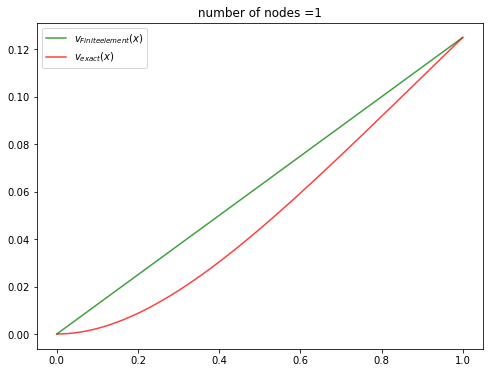

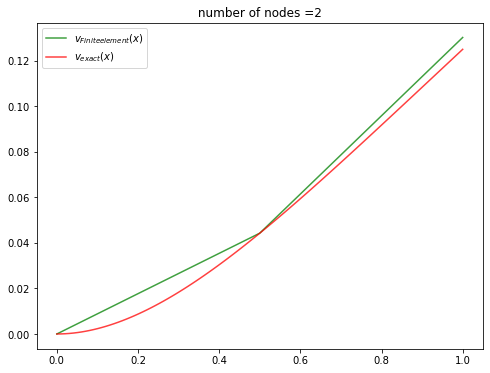

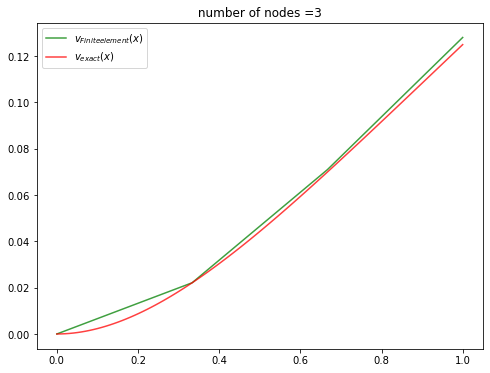

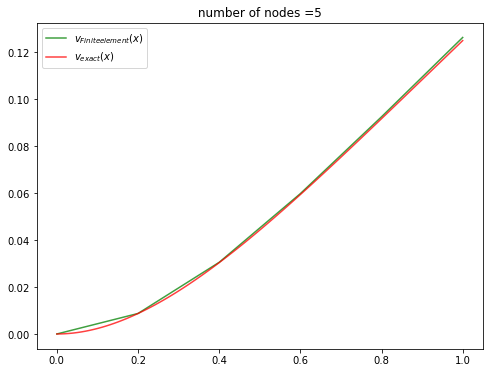

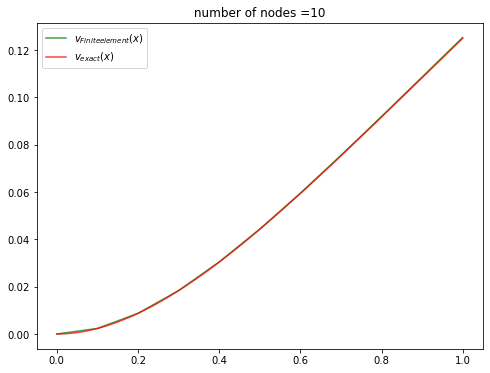

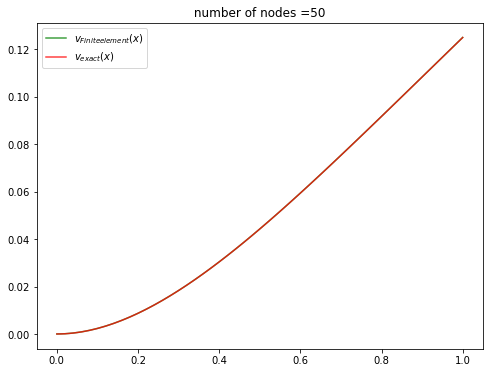

In [19]:
N=[1,2,3,5,10,50]

for n in N :
    E=1
    Igz=1
    xx=np.linspace(0,1,100)
    q=np.ones(100)
    for i in range(100):
        q[i]=1
    solanalytique= (1/(24*E*Igz))*pow(xx,2)*(pow(xx,2)-4*xx+6) #+ (2.4/120*E*Igz)*(20*pow(xx,2)-10*pow(xx,3)+pow(xx,5))
    u=np.linalg.inv(K(E,Igz,1,n)[2:,2:])@F1(q,1,n)[2:]
    #u2=[*[0,0],*list(u)]
    u1=list()
    u1.append(0)
    for i in range(len(u)):
        if(i%2==0):
            u1.append(u[i])
    xx2=np.linspace(0,1,len(u1))
    plt.figure(figsize=(8,6))
    plt.plot(xx2, u1, color = "green", alpha= 0.75, label = "$v_{Finite element}(x)$")
    plt.plot(xx, solanalytique, color = "red", alpha= 0.75, label = "$v_{exact}(x)$")
    plt.title(" number of nodes ={} ".format(n))
    plt.legend()
    plt.show()


**It can be seen that as n increases the finite element solution gets closer and closer to the exact solution**.

# **Visualization of deformation on the beam**

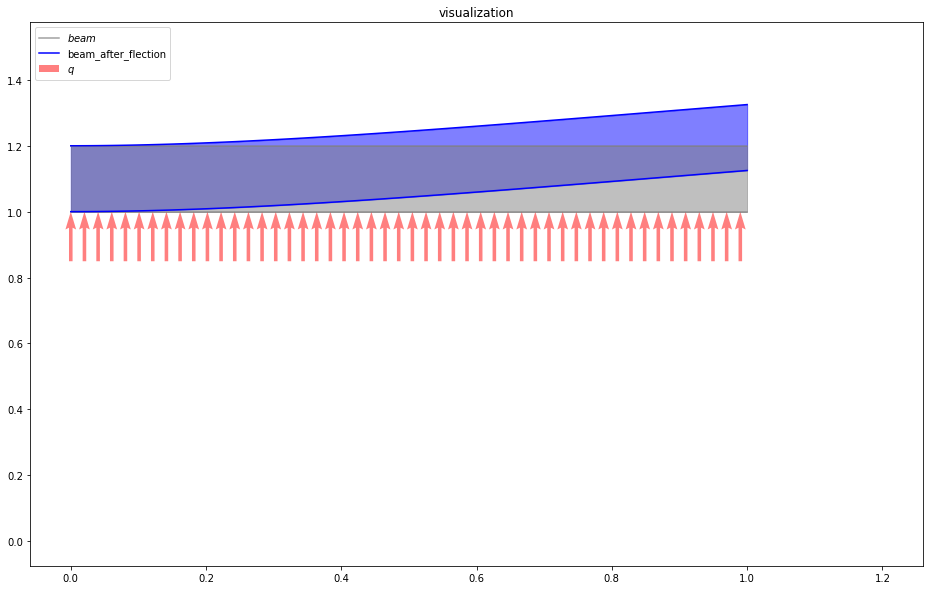

In [21]:
x=np.linspace(0,1,100)
x1=np.ones(100)
x3=np.zeros(100)
x3[99]=1.5
x2=np.ones(100)
v=list()
for i in range (100):
    v.append(x1[i]+solanalytique[i])
plt.figure(figsize=(16,10))
plt.plot(1.2*x,x3,color='white')
x4=np.zeros(100)
x4+=x1;
for i in range(0,100) :
    x4[i]+=0.2
plt.plot(x, x1, color = "gray", alpha= 0.75, label = "$beam$")
plt.plot(x, x4, color = "gray", alpha= 0.75)
#plt.plot(x, v, color="viridis", alpha= 0.75, label = "poutre_apres_flexion ")
z=np.ones((len(v),len(v)))
v1=np.zeros(100);
v1+=v;
for i in range(0,100) :
    v1[i]+=0.2
plt.plot(x,v, color='blue' ,label = "beam_after_flection")
plt.plot(x,v1,color='blue')
plt.fill_between(x,v,v1, cmap='viridis',color='blue',
                 alpha=0.5)
plt.fill_between(x,x1,x4, cmap='viridis',color='gray',
                 alpha=0.5)
plt.quiver(x[::2], x1[::2], 0, x2[::2] , color = "red", alpha = 0.5, pivot = 'tip', width = 0.004, label = "$q$")

plt.title("visualization")
plt.legend()

plt.show()

**Comparison with the exact solution for $q(x)=2.4x$ and $F_{0}=0$**

the exact solution is :

$v(x)=\frac{F_{0}x^2}{6EI}(3L-x)+\frac{q_{0}}{120EIgz}(\frac{20x^2}{L^2}-\frac{10x^3}{L^3}+\frac{x^5}{L^5})$

with: $q_{0}=2.4$ , $E=1$ and $Igz=1$

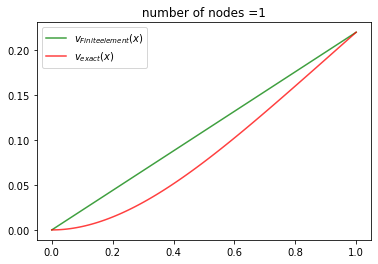

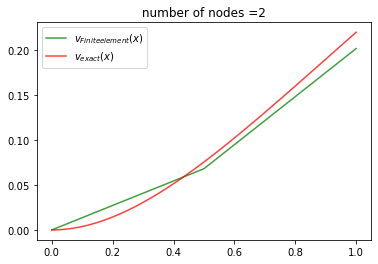

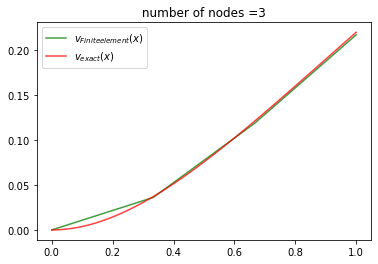

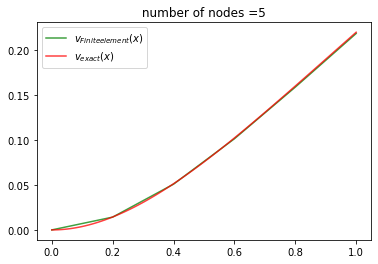

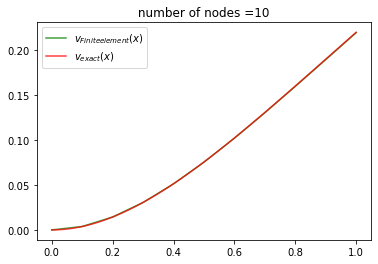

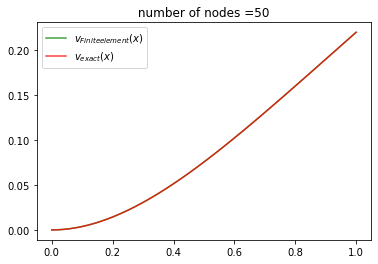

In [22]:
N=[1,2,3,5,10,50]

for n in N :
    E=1
    Igz=1
    xx=np.linspace(0,1,100)
    q=np.ones(100)
    for i in range(100):
        q[i]=1
    solanalytique= (0/(6*E*Igz))*pow(xx,2)*(3-xx) + (2.4/120*E*Igz)*(20*pow(xx,2)-10*pow(xx,3)+pow(xx,5))
  
    u=np.linalg.inv(K(E,Igz,1,n)[2:,2:])@F(q,1,n)[2:]
  #u2=[*[0,0],*list(u)]
    u1=list()
    u1.append(0)
    for i in range(len(u)):
        if(i%2==0):
            u1.append(u[i])
    xx2=np.linspace(0,1,len(u1))
    plt.plot(xx2, u1, color = "green", alpha= 0.75, label = "$v_{Finite element}(x)$")
    plt.plot(xx, solanalytique, color = "red", alpha= 0.75, label = "$v_{exact}(x)$")
    plt.title(" number of nodes ={} ".format(n))
    plt.legend()
    plt.show()

**It can also be seen that as n increases the finite element solution gets closer and closer to the exact solution**.

#**Visualization of deformation on the beam for $F_{0}=0$**

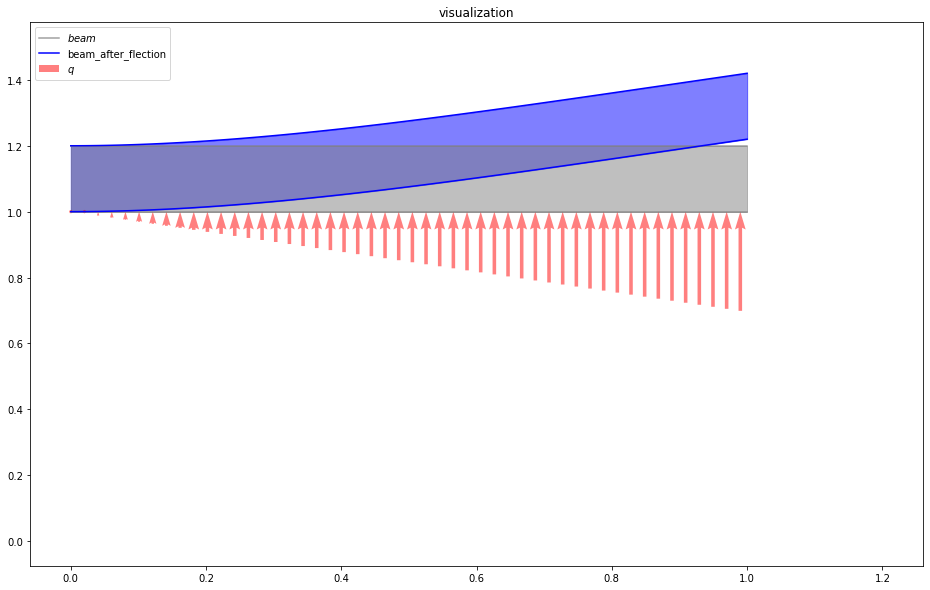

In [23]:
x=np.linspace(0,1,100)
x1=np.ones(100)
x3=np.zeros(100)
x3[99]=1.5
x2=np.ones(100)
v=list()
for i in range (100):
    v.append(x1[i]+solanalytique[i])
    x2[i]=2.4*x[i]
plt.figure(figsize=(16,10))
plt.plot(1.2*x,x3,color='white')
x4=np.zeros(100)
x4+=x1;
for i in range(0,100) :
    x4[i]+=0.2
plt.plot(x, x1, color = "gray", alpha= 0.75, label = "$beam$")
plt.plot(x, x4, color = "gray", alpha= 0.75)
#plt.plot(x, v, color="viridis", alpha= 0.75, label = "poutre_apres_flexion ")
z=np.ones((len(v),len(v)))
v1=np.zeros(100);
v1+=v;
for i in range(0,100) :
    v1[i]+=0.2
plt.plot(x,v, color='blue' ,label = "beam_after_flection")
plt.plot(x,v1,color='blue')
plt.fill_between(x,v,v1, cmap='viridis',color='blue',
                 alpha=0.5)
plt.fill_between(x,x1,x4, cmap='viridis',color='gray',
                 alpha=0.5)
plt.quiver(x[::2], x1[::2], 0, x2[::2] , color = "red", alpha = 0.5, pivot = 'tip', width = 0.004, label = "$q$")

plt.title("visualization")
plt.legend()

plt.show()

#**Calculates the shearing moments and the shear forces at the nodes, given in local form by:**

$Q_{1}=-T_y(0)$ , $Q_{2}=-M_{fz}(0)$ , $Q_{3}=T_y(h_e)$ and $Q_{4}=M_{fz}(h_e)$

with $[Q]=[K][U]-[F] $

and Analytically: $T_y(x)=F_0+\frac{q_0L}{2}(1-\frac{x^2}{L^2})$

et $M_{fz}(x)=F_0(L-x)+\frac{q_0L^2}{6}(2-3\frac{x}{L}+3\frac{x^3}{L^3})$

In [24]:
u=np.linalg.inv(K(E,Igz,1,1)[2:,2:])@F(q,1,1)[2:]
u2=[*[0,0],*list(u)]
Q=K(1,1,1,1)@u2 - F(q,1,1)
x=np.linspace(0,1,4)
Q

array([-1.20000000e+00, -8.00040812e-01, -2.22044605e-16,  5.55111512e-17])

The results are well verified for $n=1,E=1,Igz=1 $ and $ F_0=0$

# **Curve tracing :**

$T_y:$

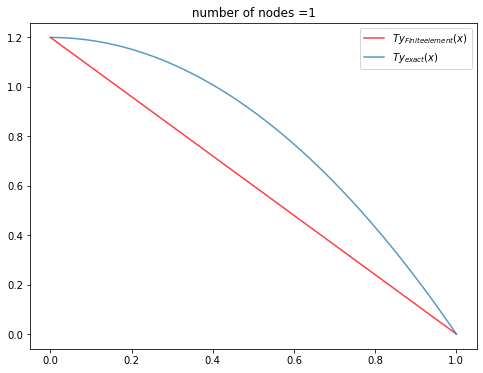

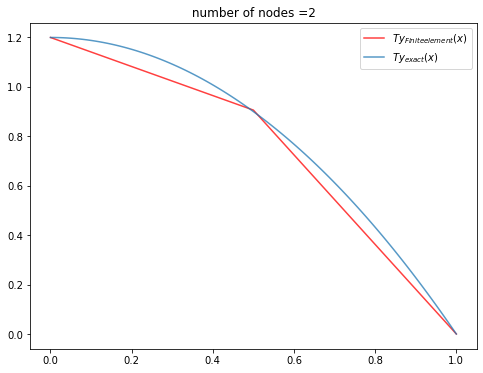

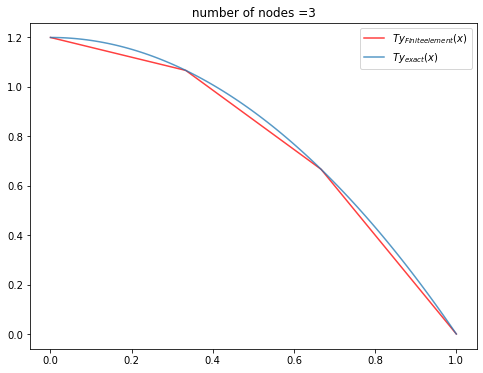

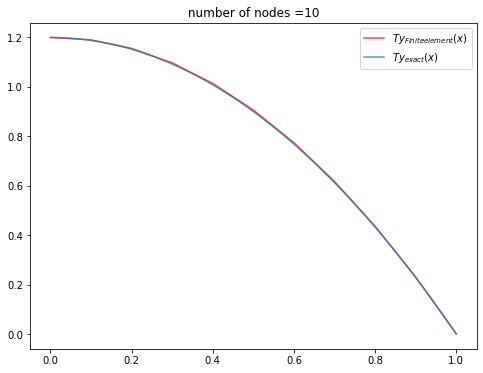

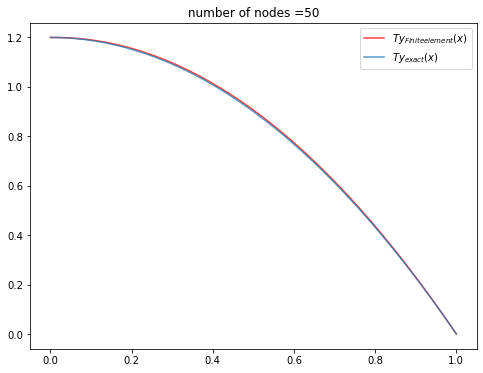

In [27]:
N=[1,2,3,10,50]

for n in N :
    E=1
    Igz=1
    xx=np.linspace(0,1,100)
    q=np.ones(100)
    for i in range(100):
        q[i]=1
    solanalytique= 0 + (2.4/2)*(1-pow(xx,2))
  
    o=np.linspace(0,99,n+1)
  
  
    u1=list()
    xx3=np.linspace(0,1,n+1)
    u=np.linalg.inv(kele(xx3[0],xx3[1],E,Igz)[2:,2:])@fele2(xx3[0],xx3[1])[2:]
    u2=[*[0,0],*list(u)]
  
    Q=kele(xx3[0],xx3[1],E,Igz)@u2 - fele2(xx3[0],xx3[1])
  
    u1.append(-Q[0])
    u1.append(Q[2]) 
    for i in range (1,n):
        u=np.linalg.inv(kele(xx3[i],xx3[i+1],E,Igz)[2:,2:])@fele2(xx3[i],xx3[i+1])[2:]
        u2=[*[0,0],*list(u)]
        #print(u2)
        Q=kele(xx3[i],xx3[i+1],E,Igz)@u2 - fele2(xx3[i],xx3[i+1])
    #print(Q)
        u1.append(Q[2])
    
    u3=list()
    u4=list()
    for i in range(n+1) :
        u4.append(solanalytique[int(o[i])])
    for i in range(len(u1)) : 
        u3.append(u1[len(u1)-i-1])
    xx2=np.linspace(0,1,len(u4))
    plt.figure(figsize=(8,6))
    plt.plot(xx2, u4, color = "red", alpha= 0.75, label = "$Ty_{Finite element}(x)$")
    plt.plot(xx, solanalytique, alpha= 0.75, label = "$Ty_{exact}(x)$")
    plt.title(" number of nodes ={} ".format(n))
    plt.legend()
    plt.show()


$M_{fz} :$



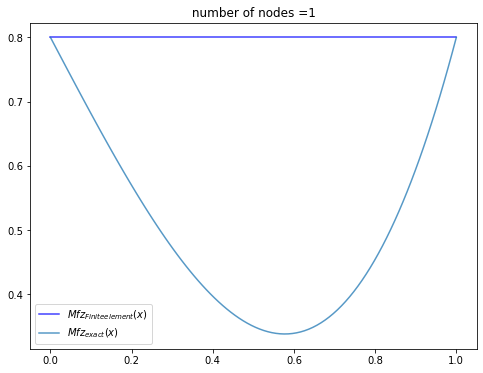

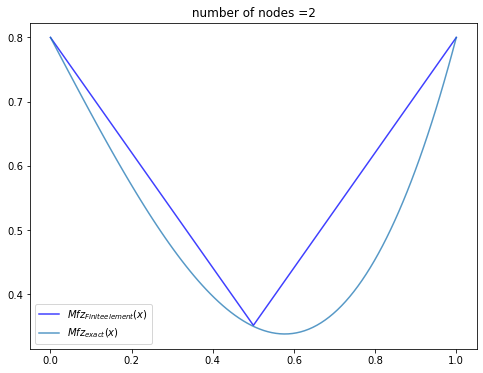

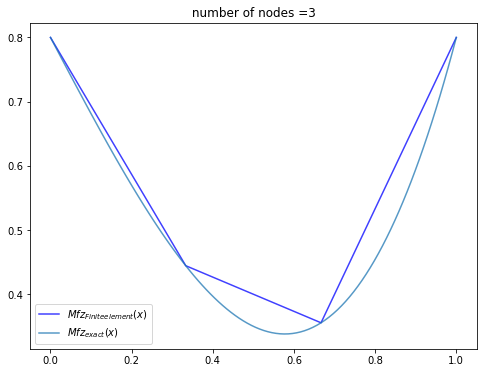

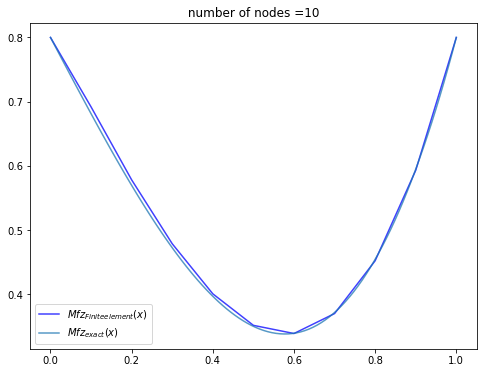

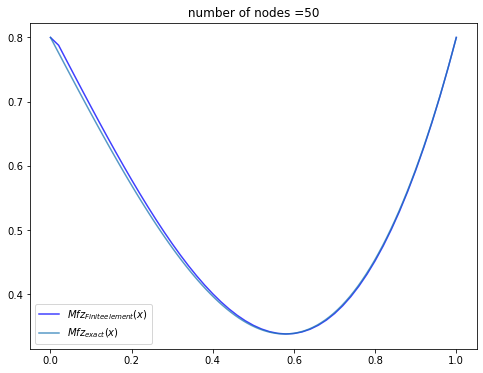

In [29]:
N=[1,2,3,10,50]

for n in N :
    E=1
    Igz=1
    xx=np.linspace(0,1,100)
    q=np.ones(100)
    for i in range(100):
        q[i]=1
    solanalytique= 0 + (2.4/6)*(2-3*xx+3*pow(xx,3))
    o=np.linspace(0,99,n+1)
  
    u1=list()
    xx3=np.linspace(0,1,n+1)
    u=np.linalg.inv(kele(xx3[0],xx3[1],E,Igz)[2:,2:])@fele2(xx3[0],xx3[1])[2:]
    u2=[*[0,0],*list(u)]
      #print(u2)
    Q=kele(xx3[0],xx3[1],E,Igz)@u2 - fele2(xx3[0],xx3[1])
  #print(Q)
    u1.append(-Q[0])
    u1.append(Q[2]) 
    for i in range (1,n):
        u=np.linalg.inv(kele(xx3[i],xx3[i+1],E,Igz)[2:,2:])@fele2(xx3[i],xx3[i+1])[2:]
        u2=[*[0,0],*list(u)]
    #print(u2)
        Q=kele(xx3[i],xx3[i+1],E,Igz)@u2 - fele2(xx3[i],xx3[i+1])
    #print(Q)
        u1.append(Q[2])
    
    u3=list()
    u4=list()
    for i in range(n+1) :
        u4.append(solanalytique[int(o[i])])
    for i in range(len(u1)) : 
        u3.append(u1[len(u1)-i-1])
    xx2=np.linspace(0,1,len(u4))
    plt.figure(figsize=(8,6))
    plt.plot(xx2, u4, color = "blue", alpha= 0.75, label = "$Mfz_{Finite element}(x)$")
    plt.plot(xx, solanalytique, alpha= 0.75, label = "$Mfz_{exact}(x)$")
    plt.title(" number of nodes ={} ".format(n))
    plt.legend()
    plt.show()